In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import os
import numpy as np
import tensorflow as tf
from  tensorflow.keras.preprocessing.image  import ImageDataGenerator
from  tensorflow.keras.preprocessing  import image
from  tensorflow.keras.optimizers import RMSprop



In [49]:
training = ImageDataGenerator(rescale= 1/255)
Validation = ImageDataGenerator(rescale= 1/255)

In [50]:
train_dataset = training.flow_from_directory('C:/Users/HANISH RAWAL/Python1/VS.cOde/Computer vision/AI/training',target_size=(200,200),
                                                batch_size=3,class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [51]:
Validation_dataset = training.flow_from_directory('C:/Users/HANISH RAWAL/Python1/VS.cOde/Computer vision/AI/Validation',target_size=(200,200),
                                                batch_size=3,class_mode = 'binary')

Found 10 images belonging to 2 classes.


In [52]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)),
                       tf.keras.layers.MaxPool2D(2,2),
                       #
                                      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                      tf.keras.layers.MaxPool2D(2,2),
                       #
                                      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                       tf.keras.layers.MaxPool2D(2,2),
                       
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512,activation ='relu'),
                                     tf.keras.layers.Dense(1,activation ='sigmoid') 
                         ])

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

C:\Users\HANISH RAWAL\Python1\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [58]:
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=  Validation_dataset)

Epoch 1/10
3/3 [==============================] - 1s 449ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 436ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7114 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 426ms/step - loss: 7.3532e-04 - accuracy: 1.0000 - val_loss: 0.7176 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 1s 427ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8379 - val_accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 1s 416ms/step - loss: 5.6170e-04 - accuracy: 1.0000 - val_loss: 0.8298 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 1s 425ms/step - loss: 2.7012e-04 - accuracy: 1.0000 - val_loss: 0.8956 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 1s 412ms/step - loss: 2.9560e-04 - accuracy: 1.0000 - val_loss: 0.9613 - val_accuracy: 0.5000
Epoc

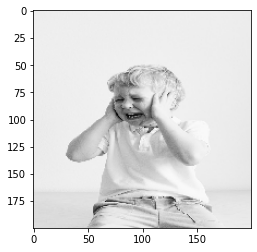

you are Sad


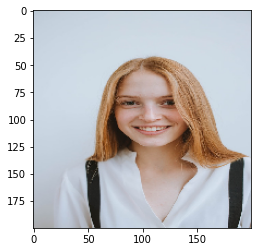

you are Happy


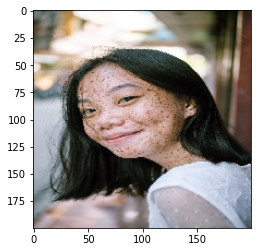

you are Happy


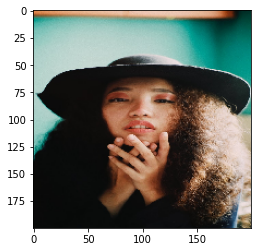

you are Sad


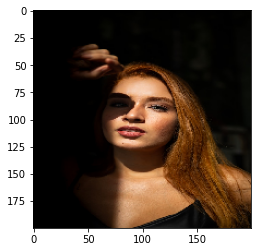

you are Happy


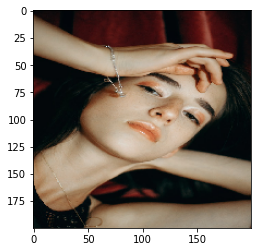

you are Happy


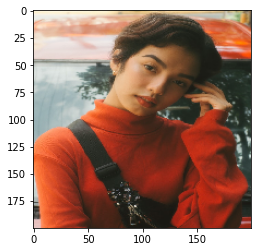

you are Happy


In [61]:
import pandas as pd
from PIL import Image
d_path = 'C:/Users/HANISH RAWAL/Python1/VS.cOde/Computer vision/AI/Testing'
for i in os.listdir(d_path):
    img = image.load_img(d_path +'//'+i,target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])

    val = model.predict(images)
    if val == 0:
        print("you are Happy")
    else:
        print("you are Sad")

    